In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nse-stock-historical-price-data/nse_all_stock_data (1).csv


In [5]:
stock_frame = pd.read_csv('/kaggle/input/nse-stock-historical-price-data/nse_all_stock_data (1).csv')
print(stock_frame.head())

         Date  RELIANCE  TCS  HDFCBANK  ICICIBANK  BHARTIARTL  SBIN  INFY  \
0  1991-01-02       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
1  1991-01-03       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
2  1991-01-04       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
3  1991-01-07       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
4  1991-01-08       NaN  NaN       NaN        NaN         NaN   NaN   NaN   

   LICI  ITC  ...  COOLCAPS  ALLETEC  20MICRONS  VIKASECO  ORIENTBELL  DONEAR  \
0   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
1   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
2   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
3   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
4   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   

   CAREERP  INTLCONV  SHREEPUSHK  PRITIKAUTO  
0  

In [6]:
test_frame = stock_frame[['Date','RELIANCE']]
test_frame = test_frame.dropna()

test_frame['Date'] = pd.to_datetime(test_frame['Date'])

test_frame['Year'] = test_frame['Date'].dt.year
print(test_frame.head())

           Date   RELIANCE  Year
1303 1996-01-01  14.691803  1996
1304 1996-01-02  14.577553  1996
1305 1996-01-03  14.688232  1996
1306 1996-01-04  14.552561  1996
1307 1996-01-05  14.452592  1996


In [7]:
#print(test_frame['Year'].value_counts())
agg_frame = test_frame[['RELIANCE', 'Year']]
agg_frame = agg_frame.groupby('Year').mean()
print(agg_frame.head())

       RELIANCE
Year           
1996  14.933807
1997  23.392484
1998  20.652720
1999  25.319532
2000  46.416458


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='RELIANCE'>

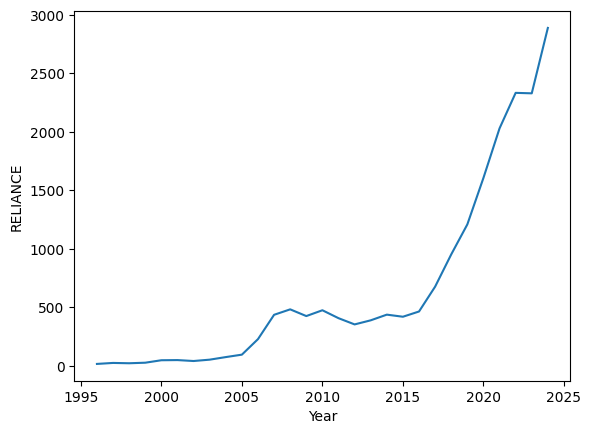

In [9]:

sns.lineplot(data= agg_frame, x = 'Year', y = 'RELIANCE')

In [8]:
dates = [str(i)+'-01-01' for i in range(1995,2026)]
print(dates)
labels = [str(i) for i in range(1995,2026)]
print(labels)

['1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01']
['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


[Text(9131.0, 0, '1995'),
 Text(9496.0, 0, '1996'),
 Text(9862.0, 0, '1997'),
 Text(10227.0, 0, '1998'),
 Text(10592.0, 0, '1999'),
 Text(10957.0, 0, '2000'),
 Text(11323.0, 0, '2001'),
 Text(11688.0, 0, '2002'),
 Text(12053.0, 0, '2003'),
 Text(12418.0, 0, '2004'),
 Text(12784.0, 0, '2005'),
 Text(13149.0, 0, '2006'),
 Text(13514.0, 0, '2007'),
 Text(13879.0, 0, '2008'),
 Text(14245.0, 0, '2009'),
 Text(14610.0, 0, '2010'),
 Text(14975.0, 0, '2011'),
 Text(15340.0, 0, '2012'),
 Text(15706.0, 0, '2013'),
 Text(16071.0, 0, '2014'),
 Text(16436.0, 0, '2015'),
 Text(16801.0, 0, '2016'),
 Text(17167.0, 0, '2017'),
 Text(17532.0, 0, '2018'),
 Text(17897.0, 0, '2019'),
 Text(18262.0, 0, '2020'),
 Text(18628.0, 0, '2021'),
 Text(18993.0, 0, '2022'),
 Text(19358.0, 0, '2023'),
 Text(19723.0, 0, '2024'),
 Text(20089.0, 0, '2025')]

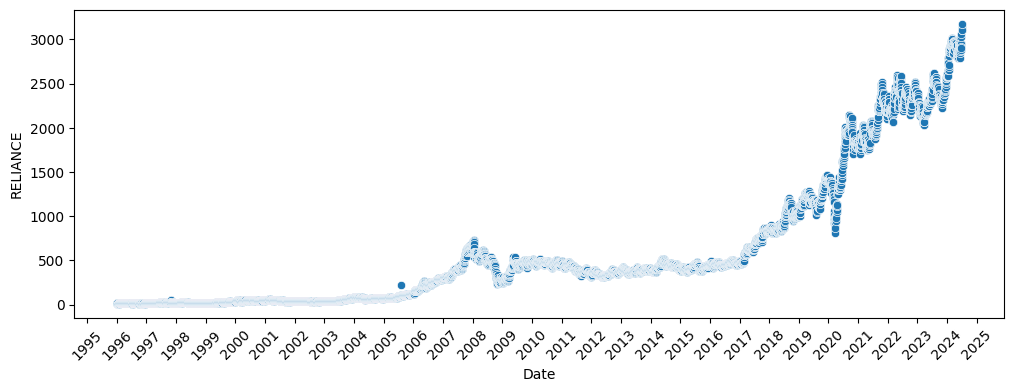

In [14]:
plt.figure(figsize=(12,4))
g=sns.scatterplot(data = test_frame, x = 'Date', y = 'RELIANCE')
g.set_xticks(dates)
g.set_xticklabels(labels,rotation=45)